In [39]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [40]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [41]:
X_train = X_train/255
X_test = X_test/255

In [42]:
X_train[0].shape

(28, 28)

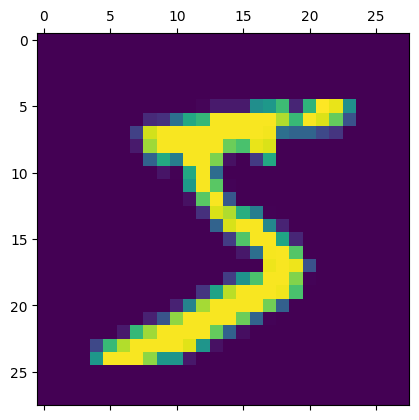

In [43]:
plt.matshow(X_train[0])

In [44]:
y_train[0]

np.uint8(5)

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8723 - loss: 0.4596
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9612 - loss: 0.1327
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9753 - loss: 0.0862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9810 - loss: 0.0623
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9850 - loss: 0.0500


In [46]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0913


[0.07981666922569275, 0.9761999845504761]

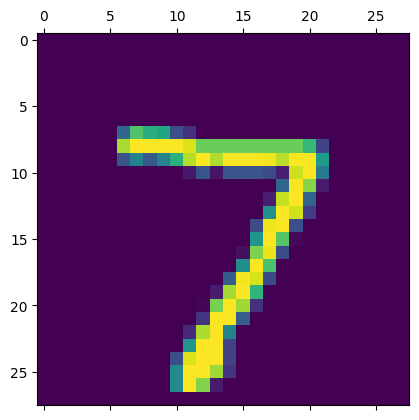

In [47]:
plt.matshow(X_test[0])

In [48]:
y_predicted = model.predict(X_test)
print(np.argmax(y_predicted[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
7


In [49]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [50]:
cm = tf.math.confusion_matrix(y_test, y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

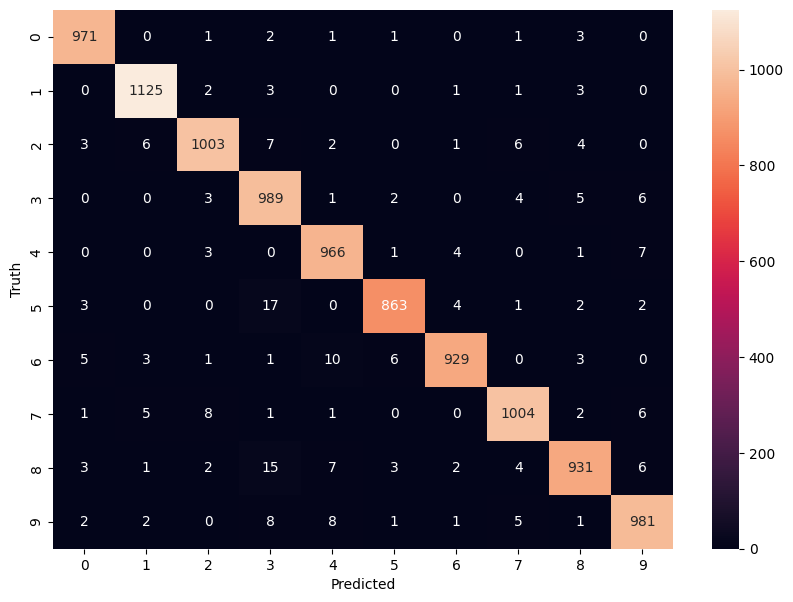

In [51]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")